___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

__Data vocabulary:__
1. age: The person's age in years
2. sex: The person's sex (1 = male, 0 = female)
3. cp: The chest pain experienced (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)
4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
5. chol: The person's cholesterol measurement in mg/dl
6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thalach: The person's maximum heart rate achieved
9. exang: Exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)
11. slope: the slope of the peak exercise ST segment (Value 0: upsloping, Value 1: flat, Value 2: downsloping)
12. ca: The number of major vessels (0-3)
13. thal: A blood disorder called thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect)
14. target: Heart stroke (0 = no, 1 = yes)

# Import esential Libraries

In [690]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

# Ingest the data to notebook

In [691]:
df=pd.read_csv('heart - heart.csv')

In [692]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [693]:
df.shape

(303, 14)

# EDA

In [694]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [695]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [696]:
df.duplicated().value_counts()

False    302
True       1
dtype: int64

In [697]:
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

In [698]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.000,54.421,9.048,29.000,48.000,55.500,61.000,77.000
sex,302.000,0.682,0.466,0.000,0.000,1.000,1.000,1.000
cp,302.000,0.964,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,302.000,131.603,17.563,94.000,120.000,130.000,140.000,200.000
chol,302.000,246.500,51.753,126.000,211.000,240.500,274.750,564.000
fbs,302.000,0.149,0.357,0.000,0.000,0.000,0.000,1.000
restecg,302.000,0.526,0.526,0.000,0.000,1.000,1.000,2.000
thalach,302.000,149.570,22.904,71.000,133.250,152.500,166.000,202.000
exang,302.000,0.328,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,302.000,1.043,1.161,0.000,0.000,0.800,1.600,6.200


In [699]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

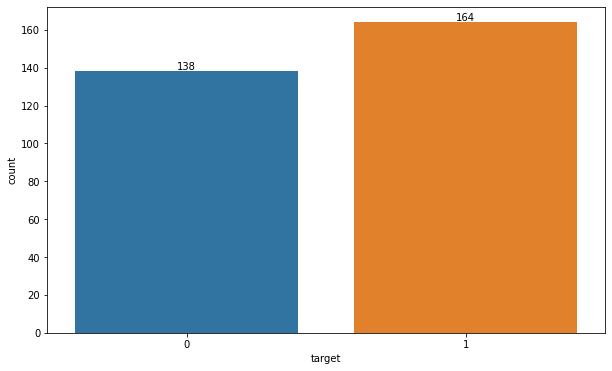

In [700]:
ax = sns.countplot(df.target)
ax.bar_label(ax.containers[0]);

<AxesSubplot:xlabel='age'>

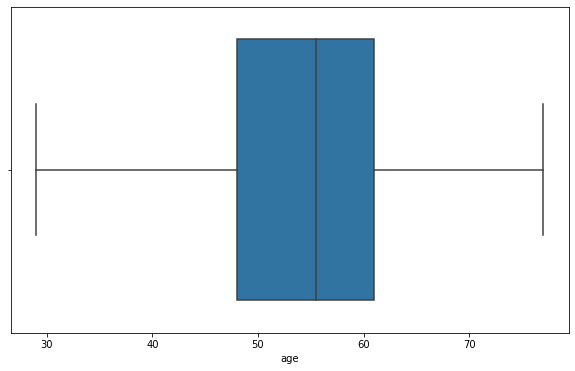

In [701]:
sns.boxplot(df.age)

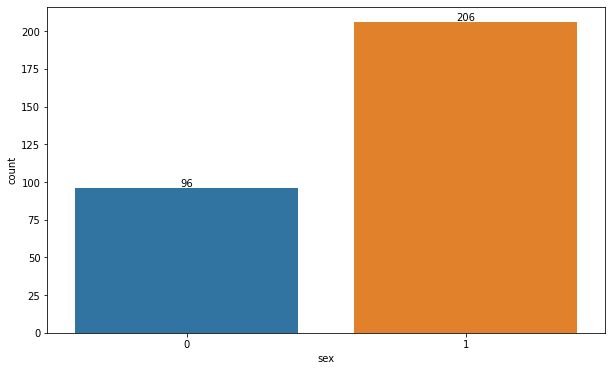

In [702]:
ax = sns.countplot(df.sex)
ax.bar_label(ax.containers[0]);

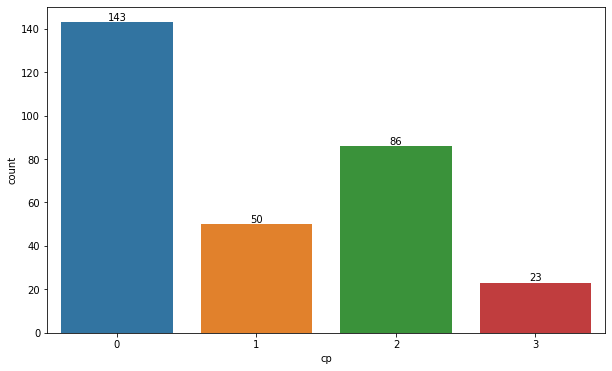

In [703]:
ax = sns.countplot(df.cp)
ax.bar_label(ax.containers[0]);

<AxesSubplot:xlabel='trestbps'>

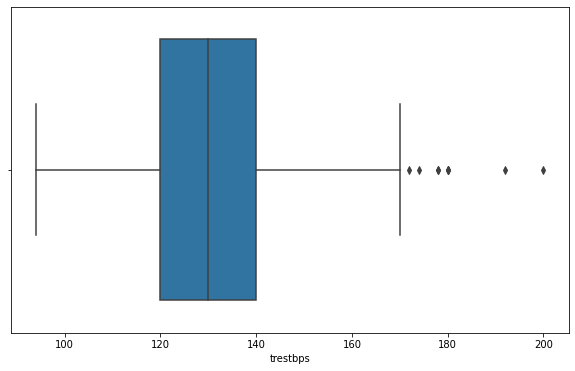

In [704]:
sns.boxplot(df.trestbps)

<AxesSubplot:xlabel='chol'>

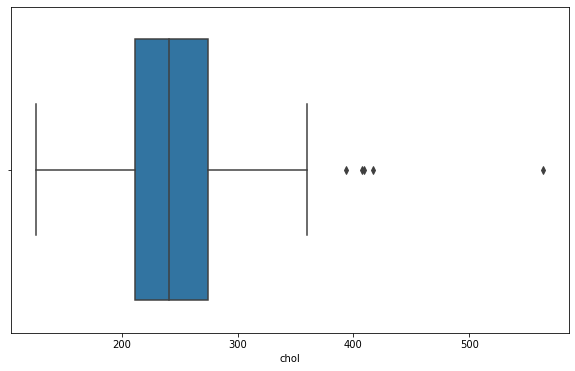

In [705]:
sns.boxplot(df.chol)

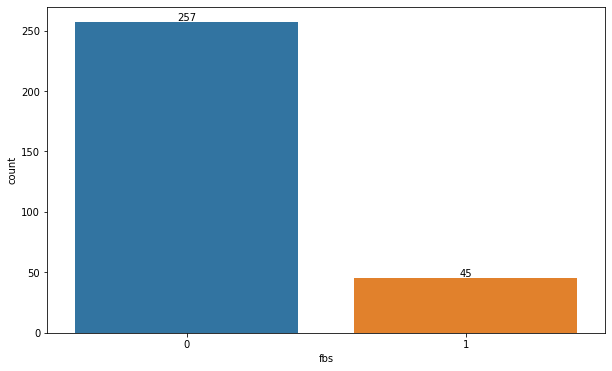

In [706]:
ax = sns.countplot(df.fbs)
ax.bar_label(ax.containers[0]);

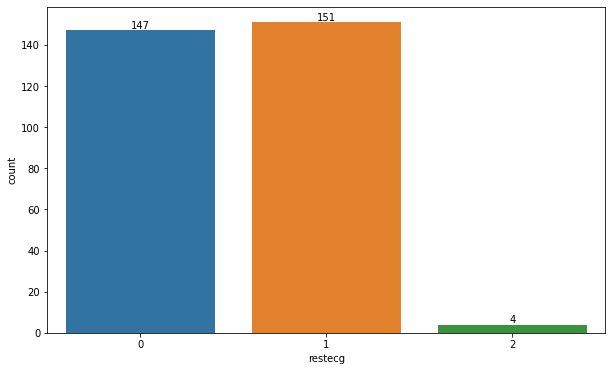

In [707]:
ax = sns.countplot(df.restecg)
ax.bar_label(ax.containers[0]);

<AxesSubplot:xlabel='thalach'>

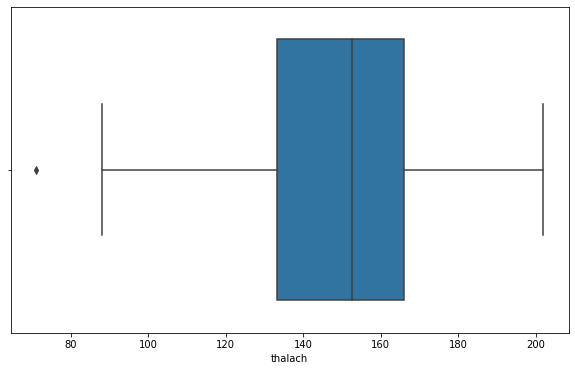

In [708]:
sns.boxplot(df.thalach)

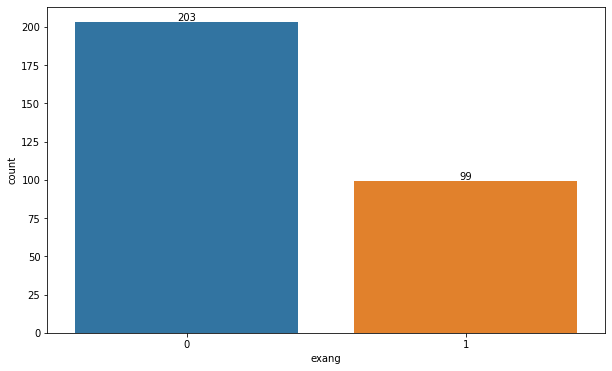

In [709]:
ax = sns.countplot(df.exang)
ax.bar_label(ax.containers[0]);

<AxesSubplot:xlabel='oldpeak'>

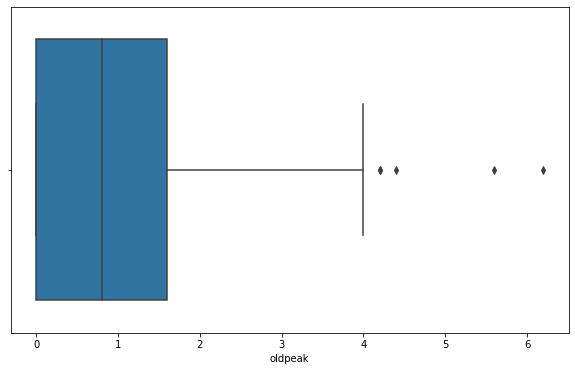

In [710]:
sns.boxplot(df.oldpeak)

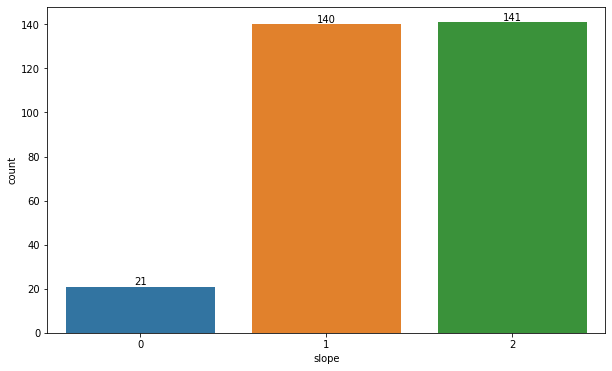

In [711]:
ax = sns.countplot(df.slope)
ax.bar_label(ax.containers[0]);

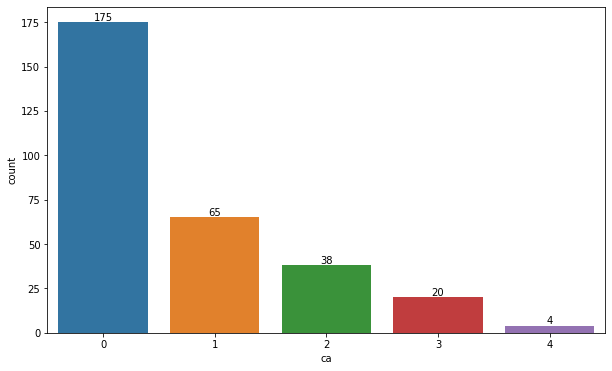

In [712]:
ax = sns.countplot(df.ca)
ax.bar_label(ax.containers[0]);

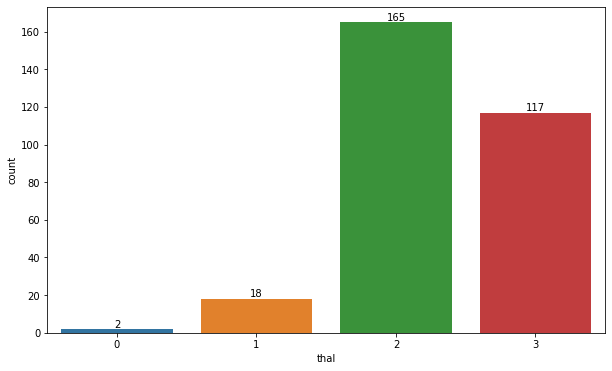

In [713]:
ax = sns.countplot(df.thal)
ax.bar_label(ax.containers[0]);

__Summary:__ From the box plots and count plots, it can be seen that dataset contains categorical and numerical variables. And the readability is as expected. Therefore, the one way to increase readability the columns would be renamed and the ordinal values of categorical variables would be converted into nominal values. Notice that the last variable just above has four values. But, description indicates it takes only three values, normal, fixed defect and reversable defect. So, zero thal values would be dropped now.

In [714]:
#remenber thalassemia feature with value of nothing
df[df['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.000,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.000,1,0,0,0


In [715]:
#Now drop thalassemia values of nothing
df=df[df['thal']!=0]

In [716]:
#reset index
df=df.reset_index(drop=True)
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
295,57,0,0,140,241,0,1,123,1,0.200,1,0,3,0
296,45,1,3,110,264,0,1,132,0,1.200,1,0,3,0
297,68,1,0,144,193,1,1,141,0,3.400,1,2,3,0
298,57,1,0,130,131,0,1,115,1,1.200,1,1,3,0
299,57,0,1,130,236,0,0,174,0,0.000,1,1,2,0


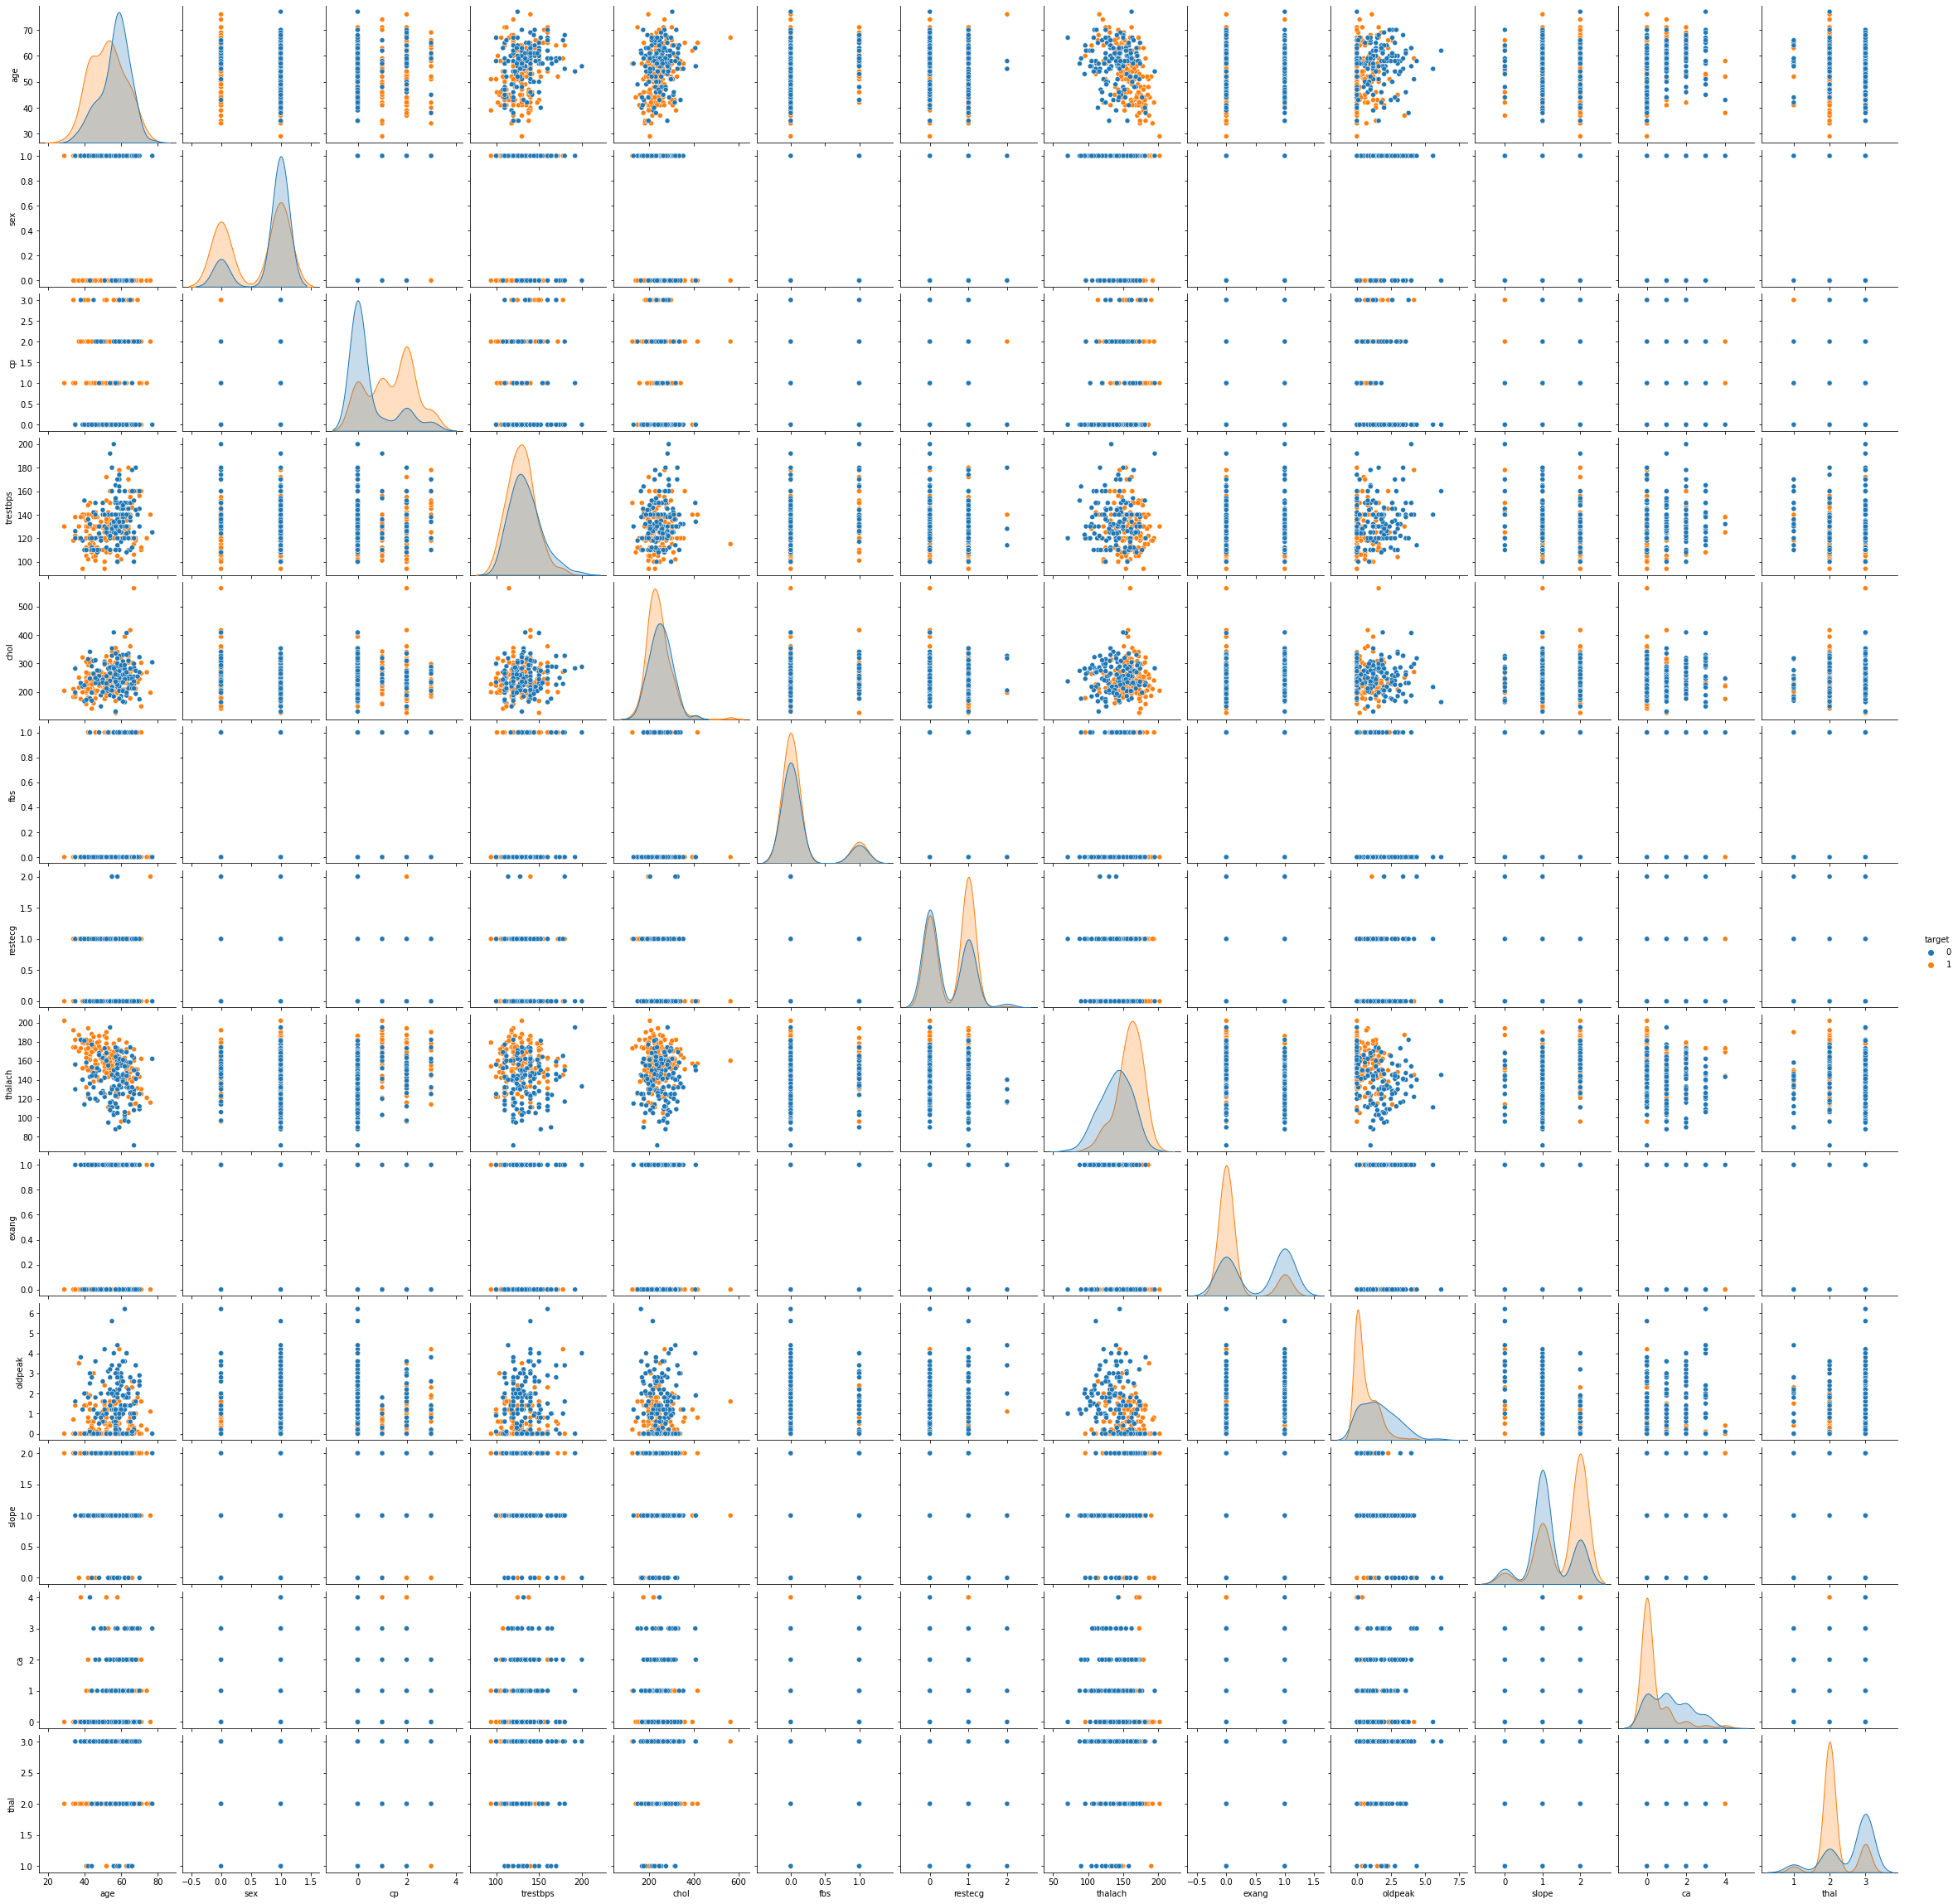

In [717]:
sns.pairplot(df, hue="target");

<AxesSubplot:>

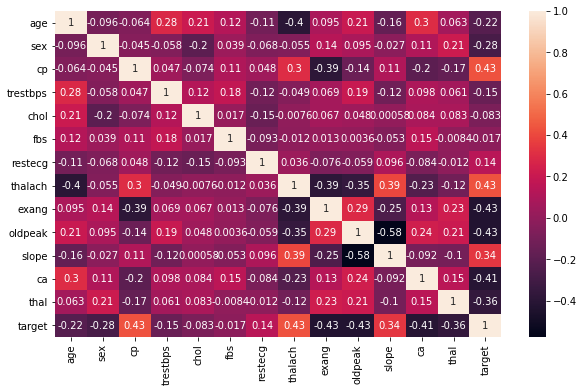

In [718]:
sns.heatmap(df.corr(),annot=True)

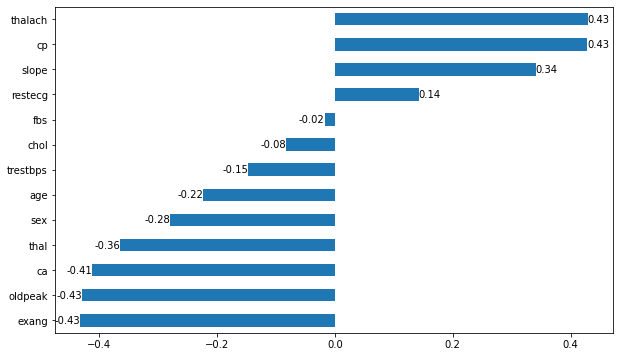

In [719]:
ax = df.corr()["target"].drop("target").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

The most correlated variables with target are thalach, exang, oldpeak, cp and ca.

### The Types of Independent Features and Conversions

Mainly, there are two types of variables, quantitative (numerical) and qualitative (categorical). Quantitative variables are either continuous or discreet, whereas qualitative variables are nominal or ordinal.

__Quantitiative Variables:__ Age, resting blood pressure (trestbps), serum cholestoral (chol), maximum heart rate achieved (thalach),  ST depression induced by exercise relative to rest (oldpeak) and  number of major vessels (ca) are numerical variables. But, resting blood pressure (trestbps), serum cholestoral (chol), ST depression induced by exercise relative to rest (oldpeak) are ___continuous variables___. And age and thalach are ___discreet variables___.

__Qualitative Variables:__ Sex, chest pain typ (cp), fasting blood sugar (fbs), resting electrocardiographic results (restecg), exercise induced angina (exang), the slope of the peak exercise ST segment (slolpe) and blood disorder called thalassemia are ___categorical variables___. All variables are now ordinal. But, in order to make the data more readable it is useful to convert all of them to nominal. And then use dummies before modelling.

___Rename the values according to explanations (https://archive.ics.uci.edu/ml/datasets/Heart+Disease) as follows:___

In [720]:
#firstly, rename the columns as follows
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [721]:
#now assign nominal values to categorical features
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

In [722]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      300 non-null    int64  
 1   sex                      300 non-null    object 
 2   chest_pain_type          300 non-null    object 
 3   resting_blood_pressure   300 non-null    int64  
 4   cholesterol              300 non-null    int64  
 5   fasting_blood_sugar      300 non-null    object 
 6   rest_ecg                 300 non-null    object 
 7   max_heart_rate_achieved  300 non-null    int64  
 8   exercise_induced_angina  300 non-null    object 
 9   st_depression            300 non-null    float64
 10  st_slope                 300 non-null    object 
 11  num_major_vessels        300 non-null    int64  
 12  thalassemia              300 non-null    object 
 13  target                   300 non-null    int64  
dtypes: float64(1), int64(6), o

In [723]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,300.000,54.433,9.077,29.000,47.750,56.000,61.000,77.000
resting_blood_pressure,300.000,131.627,17.620,94.000,120.000,130.000,140.000,200.000
cholesterol,300.000,246.743,51.838,126.000,211.000,241.500,275.000,564.000
max_heart_rate_achieved,300.000,149.663,22.890,71.000,133.750,152.500,166.000,202.000
st_depression,300.000,1.047,1.164,0.000,0.000,0.800,1.600,6.200
num_major_vessels,300.000,0.723,1.008,0.000,0.000,0.000,1.000,4.000
target,300.000,0.543,0.499,0.000,0.000,1.000,1.000,1.000


In [724]:
df.shape

(300, 14)

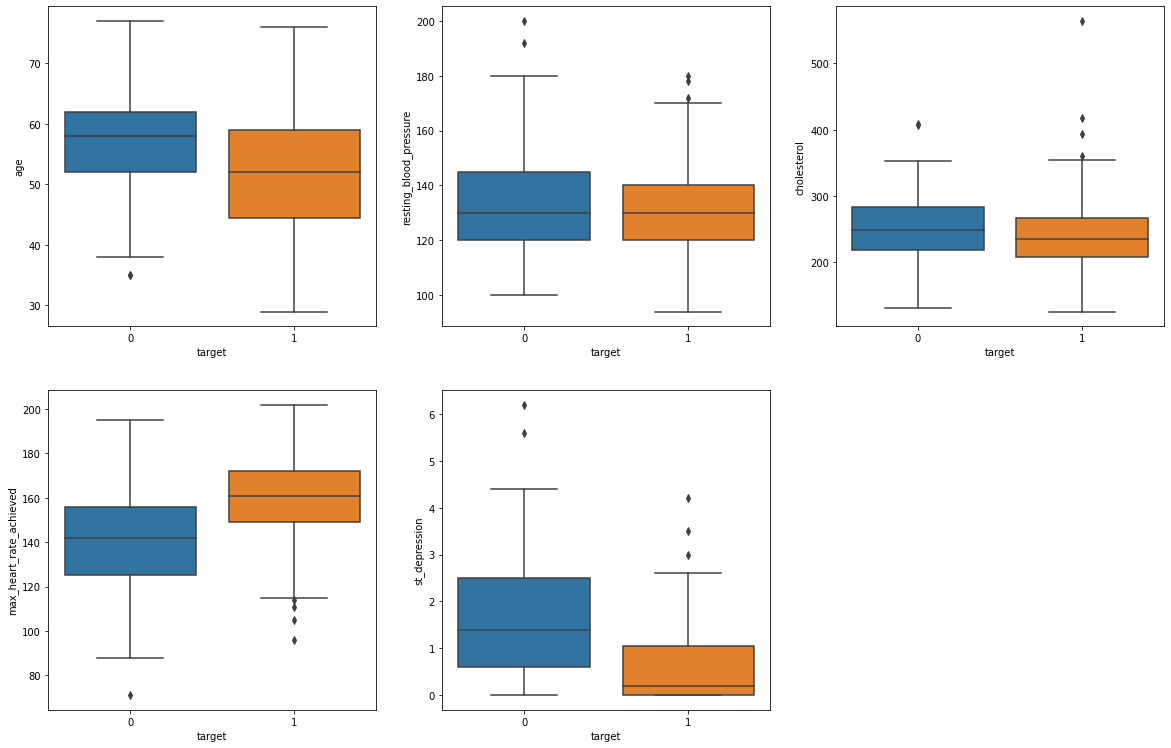

In [725]:
#let us check box plots of continuous variables with respect to target variable
index = 0
temp_df=df[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','target']]
plt.figure(figsize=(20,20))
for feature in temp_df.columns:
    if feature != "target":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='target',y=feature, data=temp_df)

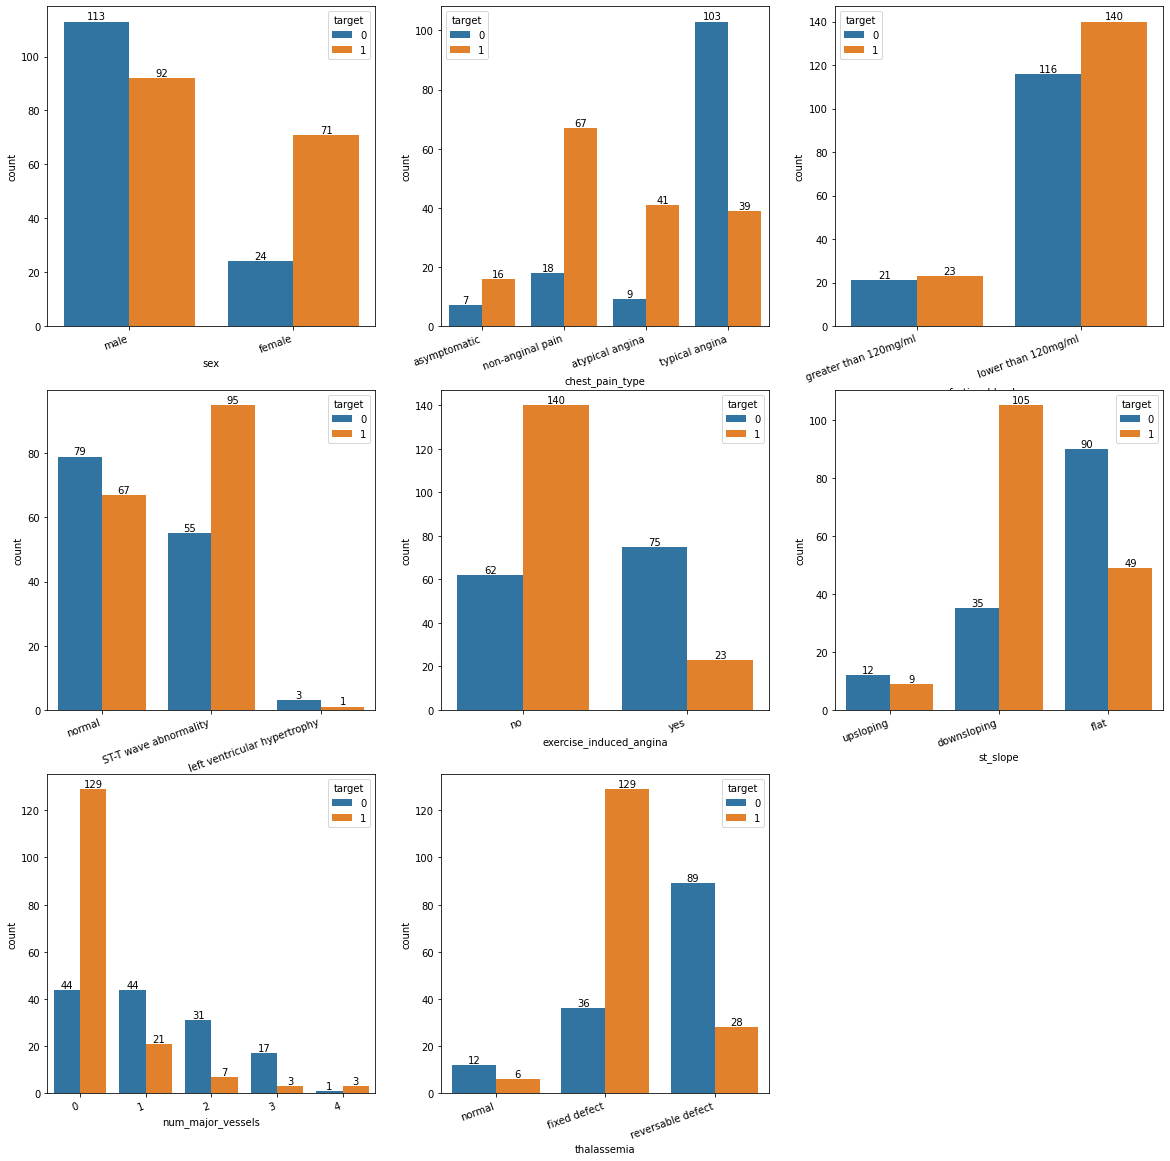

In [726]:
#let us check count plots of categorical and discreet numerical variables
index = 0
temp_df=df[[ 'sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target']]
plt.figure(figsize=(20,20))
for feature in temp_df.columns:
    if feature != "target":
        index += 1
        plt.subplot(3,3,index)
        ax = sns.countplot(x=feature, hue='target', data=temp_df)
        ax.bar_label(ax.containers[0])
        ax.bar_label(ax.containers[1])
        plt.setp(ax.get_xticklabels(), ha="right", rotation=20);

### Skewness of Numerical Variables

In [727]:
skew_vals = abs(df[['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']].skew())
skew_vals

age                       0.207
resting_blood_pressure    0.710
cholesterol               1.138
max_heart_rate_achieved   0.538
st_depression             1.260
num_major_vessels         1.286
dtype: float64

The maximum skewness belongs to num_major_vessels. But, including all numerical variables, all skewnesses are acceptable.

# Data Preprocessing

In [728]:
df = pd.get_dummies(df, columns= ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 
                                  'exercise_induced_angina', 'st_slope',  'thalassemia'], drop_first=False)

In [729]:
df.head().T

,0,1,2,3,4
age,63.000,37.000,41.000,56.000,57.000
resting_blood_pressure,145.000,130.000,130.000,120.000,120.000
cholesterol,233.000,250.000,204.000,236.000,354.000
max_heart_rate_achieved,150.000,187.000,172.000,178.000,163.000
st_depression,2.300,3.500,1.400,0.800,0.600
num_major_vessels,0.000,0.000,0.000,0.000,0.000
target,1.000,1.000,1.000,1.000,1.000
sex_female,0.000,0.000,1.000,0.000,1.000
sex_male,1.000,1.000,0.000,1.000,0.000
chest_pain_type_asymptomatic,1.000,0.000,0.000,0.000,0.000


In [730]:
X = df.drop('target',axis=1)
y = df['target']

In [731]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

In [732]:
X_train.shape

(210, 25)

In [733]:
X_test.shape

(90, 25)

 ### Train-Test Sets and Scaling

In [734]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = MinMaxScaler()

In [735]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [736]:
from sklearn.linear_model import LogisticRegression

In [737]:
log_model=LogisticRegression()

In [738]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [739]:
y_pred=log_model.predict(X_test_scaled)

In [740]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [741]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data["pred_prob0"] = y_pred_proba[:,0]
test_data.sample(10)

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,...,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,target,pred,pred_proba,pred_prob0
279,59,126,218,134,2.200,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0.626,0.374
254,58,128,259,130,3.000,2,0,1,0,0,...,0,1,0,0,0,1,0,0,0.018,0.982
29,53,130,197,152,1.200,0,0,1,0,0,...,0,0,1,1,0,0,1,1,0.838,0.162
221,56,200,288,133,4.000,2,1,0,0,0,...,0,0,1,0,0,1,0,0,0.023,0.977
211,61,145,307,146,1.000,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0.121,0.879
220,65,138,282,174,1.400,1,0,1,1,0,...,0,1,0,1,0,0,0,1,0.817,0.183
130,49,134,271,162,0.000,0,1,0,0,1,...,0,1,0,1,0,0,1,1,0.920,0.080
65,51,100,222,143,1.200,0,0,1,0,0,...,0,1,0,1,0,0,1,1,0.767,0.233
76,59,140,221,164,0.000,0,0,1,0,1,...,1,0,0,1,0,0,1,1,0.853,0.147
136,62,128,208,140,0.000,0,0,1,0,1,...,1,0,0,1,0,0,1,1,0.905,0.095


## Model Performance on Classification Tasks

In [742]:
from sklearn.metrics import confusion_matrix, classification_report

In [743]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [744]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[31 10]
 [ 5 44]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.81      0.90      0.85        49

    accuracy                           0.83        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90


Train_Set
[[ 82  14]
 [ 12 102]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        96
           1       0.88      0.89      0.89       114

    accuracy                           0.88       210
   macro avg       0.88      0.87      0.88       210
weighted avg       0.88      0.88      0.88       210



<AxesSubplot:>

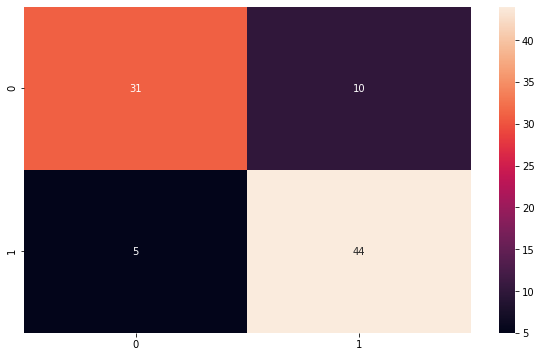

In [745]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

The Confusion Matrix: True Negative value is 31 and true Positive was 44. And the False Positive came out to be 10 and False Negative is 5.

## Cross Validation for Class 1

In [746]:
from sklearn.model_selection import cross_validate

In [747]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.017,0.005,0.769,0.833,0.800,0.762
2,0.012,0.006,0.857,1.000,0.923,0.905
3,0.013,0.005,0.733,0.917,0.815,0.762
4,0.016,0.005,0.667,0.833,0.741,0.667
5,0.016,0.010,1.000,1.000,1.000,1.000
6,0.018,0.005,0.818,0.818,0.818,0.810
7,0.012,0.004,0.917,1.000,0.957,0.952
8,0.011,0.004,0.909,0.909,0.909,0.905
9,0.010,0.004,1.000,0.727,0.842,0.857
10,0.011,0.004,0.900,0.818,0.857,0.857


In [748]:
df_scores.mean()[2:]

test_precision   0.857
test_recall      0.886
test_f1          0.866
test_accuracy    0.848
dtype: float64

The variation in scores due to cross validation is quite acceptable. It seems there is no major problem with this model.

In [749]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[31 10]
 [ 5 44]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.81      0.90      0.85        49

    accuracy                           0.83        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90


Train_Set
[[ 82  14]
 [ 12 102]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        96
           1       0.88      0.89      0.89       114

    accuracy                           0.88       210
   macro avg       0.88      0.87      0.88       210
weighted avg       0.88      0.88      0.88       210



## Cross Validation for Class 0

In [750]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [751]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}

In [639]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision_0,test_recall_0,test_f1_0
1,0.009,0.005,0.750,0.667,0.706
2,0.007,0.004,1.000,0.889,0.941
3,0.005,0.005,1.000,0.444,0.615
4,0.008,0.004,0.667,0.444,0.533
5,0.006,0.004,1.000,1.000,1.000
6,0.009,0.004,0.727,0.800,0.762
7,0.006,0.004,1.000,0.700,0.824
8,0.007,0.004,1.000,0.800,0.889
9,0.006,0.004,0.769,1.000,0.870
10,0.006,0.004,0.900,0.900,0.900


In [752]:
df_scores.mean()[2:]

test_precision   0.857
test_recall      0.886
test_f1          0.866
test_accuracy    0.848
dtype: float64

The variation in scores due to cross validation is quite acceptable. Cross validation precision score decreases from 0.88 to 0.857. But, there is no major problem.

In [753]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[31 10]
 [ 5 44]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.81      0.90      0.85        49

    accuracy                           0.83        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90


Train_Set
[[ 82  14]
 [ 12 102]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        96
           1       0.88      0.89      0.89       114

    accuracy                           0.88       210
   macro avg       0.88      0.87      0.88       210
weighted avg       0.88      0.88      0.88       210



## GridSearchCV

In [754]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [789]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
#penalty = [ "l2"]
C = [6.3, 6.4, 6.5, 6.6, 6.7, 6.8]
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [790]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [6.3, 6.4, 6.5, 6.6, 6.7, 6.8],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [791]:
grid_model.best_params_

{'C': 6.6, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}

In [763]:
grid_model.best_score_

0.903030303030303

In [792]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[31 10]
 [ 5 44]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.81      0.90      0.85        49

    accuracy                           0.83        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90


Train_Set
[[ 82  14]
 [ 10 104]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        96
           1       0.88      0.91      0.90       114

    accuracy                           0.89       210
   macro avg       0.89      0.88      0.88       210
weighted avg       0.89      0.89      0.89       210



After grid search, the is no improvement on test set for heart stroke label 1, which is the main focus of the model in order to better predict hearth strokes.

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [793]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, roc_curve,\
                            average_precision_score, precision_recall_curve

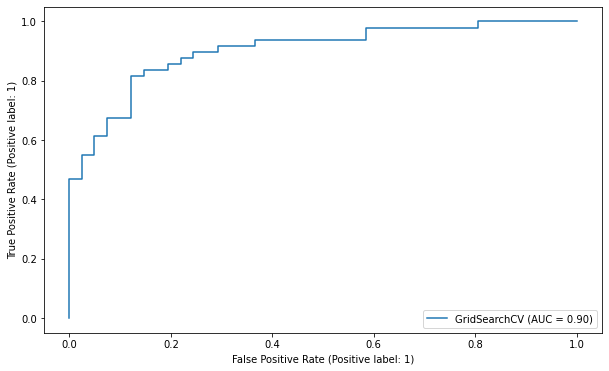

In [794]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

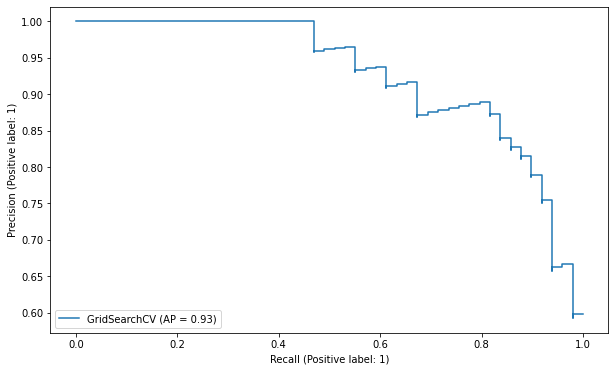

In [795]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

In here, there is improvement in recall, which increases to 0.93 from 0.9.

## Finding Best Threshold

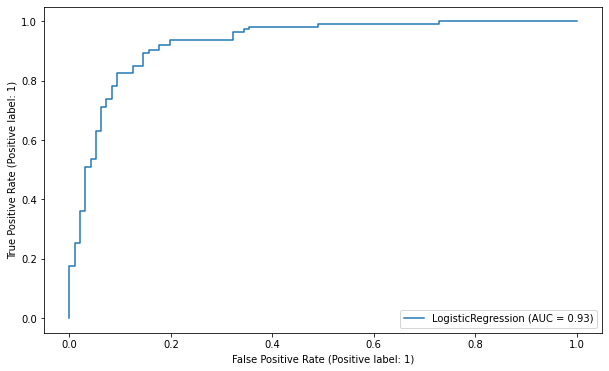

In [796]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [797]:
y_pred_proba = log_model.predict_proba(X_train_scaled) #
roc_auc_score(y_train, y_pred_proba[:,1])

0.9286366959064328

In [798]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [799]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5037472570117204

In [800]:
optimal_idx

24

In [801]:
dict = {"tp_rate":tp_rate, "fp_rate":fp_rate, "tp_rate-fp_rate":tp_rate-fp_rate, "threshold":thresholds}
pd.DataFrame(dict)

,tp_rate,fp_rate,tp_rate-fp_rate,threshold
0,0.000,0.000,0.000,1.979
1,0.009,0.000,0.009,0.979
2,0.175,0.000,0.175,0.955
3,0.175,0.010,0.165,0.954
4,0.254,0.010,0.244,0.938
5,0.254,0.021,0.234,0.938
6,0.360,0.021,0.339,0.926
7,0.360,0.031,0.328,0.924
8,0.509,0.031,0.478,0.865
9,0.509,0.042,0.467,0.863


In [802]:
pd.DataFrame(dict).sort_values(by="tp_rate-fp_rate", ascending=False)

,tp_rate,fp_rate,tp_rate-fp_rate,threshold
24,0.895,0.146,0.749,0.504
26,0.904,0.156,0.747,0.496
28,0.921,0.177,0.744,0.457
30,0.939,0.198,0.741,0.421
25,0.895,0.156,0.738,0.498
20,0.825,0.094,0.731,0.660
27,0.904,0.177,0.726,0.472
22,0.851,0.125,0.726,0.608
29,0.921,0.198,0.723,0.428
23,0.851,0.146,0.705,0.547


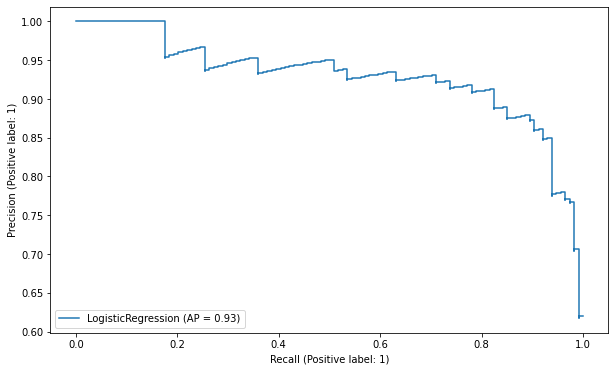

In [803]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train);

In [804]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.928703669759035

In [805]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [806]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.4214164523392824

In [807]:
class_1_proba = grid_model.predict_proba(X_test_scaled)[:,1]
class_1_proba

array([0.81599216, 0.99428078, 0.08461104, 0.03716727, 0.89141651,
       0.97080373, 0.91529788, 0.89309128, 0.96548262, 0.02717648,
       0.90669855, 0.96894977, 0.93123531, 0.41880046, 0.60407146,
       0.87965919, 0.95096014, 0.06992969, 0.18275381, 0.03546016,
       0.98358035, 0.74883827, 0.05996271, 0.00530478, 0.93204049,
       0.02396433, 0.05520901, 0.7684665 , 0.97113502, 0.98177922,
       0.09949629, 0.08380504, 0.02458391, 0.39025235, 0.12176202,
       0.59125269, 0.9426586 , 0.64585606, 0.97489713, 0.07792914,
       0.73299712, 0.05893823, 0.50723091, 0.7882758 , 0.58170858,
       0.63353024, 0.54149417, 0.84725511, 0.07961022, 0.8823067 ,
       0.95071353, 0.96887649, 0.92743234, 0.09733102, 0.72421822,
       0.00767608, 0.96101498, 0.22268211, 0.06466629, 0.94900106,
       0.04715735, 0.58874584, 0.07731711, 0.8623111 , 0.97470815,
       0.95987762, 0.00697111, 0.07735899, 0.8734651 , 0.40034953,
       0.60012849, 0.75241525, 0.73130099, 0.5701334 , 0.00391

In [808]:
y_pred2 = pd.Series(class_1_proba).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [809]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[31 10]
 [ 5 44]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.81      0.90      0.85        49

    accuracy                           0.83        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.84      0.83      0.83        90



Recall score is same with the very first recall score. So, there is no further improvement in recall scores.

### Manual Cross Validation with No Data Leakage

In [912]:
from sklearn.model_selection import StratifiedKFold

def CV(n, model, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        model = model
        scaler=MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [913]:
#{'C': 6.6, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
model = LogisticRegression(C= 6.6, class_weight= None ,penalty= 'l2',solver= 'lbfgs')
CV(10, model, pd.DataFrame(X_train_scaled), y_train, optimal_threshold)

Accuracy      82.86%  std 10.26%
Precision-1   82.42%  std 10.74%
Recall-1      88.86%  std 11.98%
F1_score-1    84.96%  std 9.25%


This result indicates that data leakage has played a role. The first cross validation with data leakage has higher scores after preventing the leakage.

In [914]:
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42) # shuffle :False ayni kalir, ama True iken daha kariyor.
for train_index, test_index in skf.split(X_train_scaled,  y_train):
    print(train_index, test_index)

[  0   1   2   4   5   6   7   9  10  11  12  13  14  15  16  17  18  19
  21  22  23  24  25  26  27  28  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  62  63  64  65  66  67  68  69  71  72  73  74  75  76  77
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  94  95  96  97
  98  99 100 101 102 103 104 105 108 109 110 111 112 113 115 116 117 119
 120 121 122 123 124 126 127 128 129 130 131 132 133 134 135 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 152 153 154 155 156 157 158
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 184 185 186 187 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 205 206 207 208 209] [  3   8  20  29  61  70  78  93 106 107 114 118 125 136 151 159 160 183
 188 189 204]
[  0   1   2   3   4   5   6   7   8  10  11  12  13  14  15  17  18  19
  20  21  22  23  24  25  26  27  29  30  31  32  33  34  35  36  37  38

### ___Final Scores of Logistic Regression___

Since the main interest is to better predict the hearth strokes before they occur. The logistic regression has a recall value of 90% (Recall in percentage: 44/49*100)

In [959]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

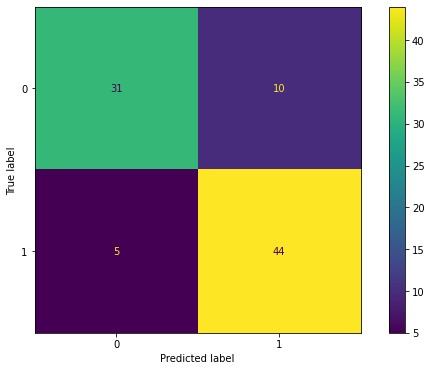

In [961]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

# Implement KNN and Evaluate

In [988]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [989]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [990]:
scaler = MinMaxScaler()

In [991]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [992]:
from sklearn.neighbors import KNeighborsClassifier

In [993]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [994]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)

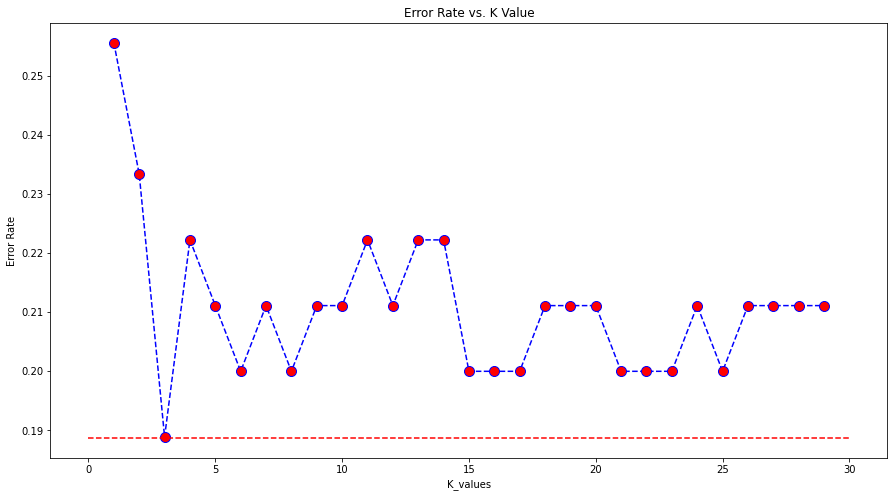

In [995]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.1887, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [996]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

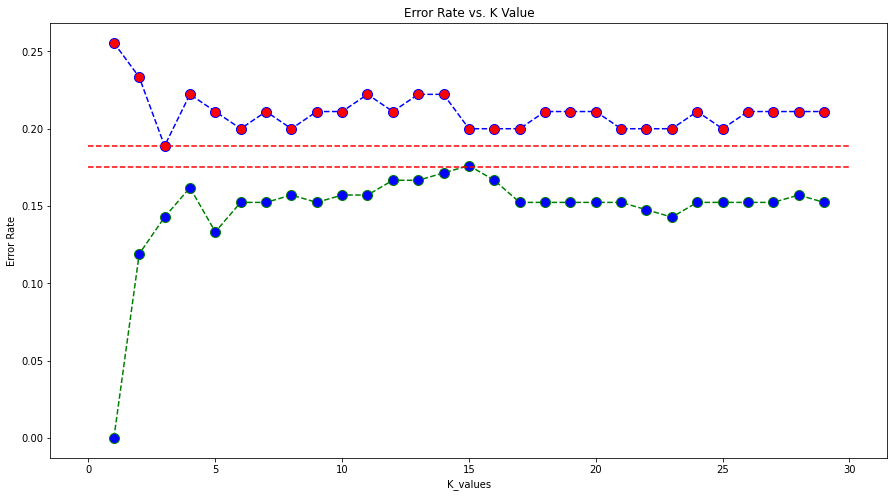

In [997]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.1887, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.175, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

## Scores by Various K Values

In [998]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [999]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled,y_train)
print('WITH K=1\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=1

Test_Set

[[28 13]
 [10 39]]
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        41
           1       0.75      0.80      0.77        49

    accuracy                           0.74        90
   macro avg       0.74      0.74      0.74        90
weighted avg       0.74      0.74      0.74        90


Train_Set

[[ 96   0]
 [  0 114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       114

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



In [1000]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled,y_train)
print('WITH K=3\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=3

Test_Set

[[31 10]
 [ 7 42]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.78        41
           1       0.81      0.86      0.83        49

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90


Train_Set

[[82 14]
 [16 98]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        96
           1       0.88      0.86      0.87       114

    accuracy                           0.86       210
   macro avg       0.86      0.86      0.86       210
weighted avg       0.86      0.86      0.86       210



In [1001]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=9

Test_Set

[[31 10]
 [ 9 40]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        41
           1       0.80      0.82      0.81        49

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90


Train_Set

[[81 15]
 [17 97]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        96
           1       0.87      0.85      0.86       114

    accuracy                           0.85       210
   macro avg       0.85      0.85      0.85       210
weighted avg       0.85      0.85      0.85       210



In [1002]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaled,y_train)
print('WITH K=15\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=15

Test_Set

[[30 11]
 [ 7 42]]
              precision    recall  f1-score   support

           0       0.81      0.73      0.77        41
           1       0.79      0.86      0.82        49

    accuracy                           0.80        90
   macro avg       0.80      0.79      0.80        90
weighted avg       0.80      0.80      0.80        90


Train_Set

[[79 17]
 [20 94]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        96
           1       0.85      0.82      0.84       114

    accuracy                           0.82       210
   macro avg       0.82      0.82      0.82       210
weighted avg       0.82      0.82      0.82       210



## Cross Validate For Optimal K Value of 3

In [1003]:
from sklearn.model_selection import cross_val_score, cross_validate

In [1004]:
#optimal k value is 3 from graph above
model = KNeighborsClassifier(n_neighbors=3)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.001,0.011,0.762,0.769,0.833,0.800
2,0.001,0.009,0.857,0.909,0.833,0.870
3,0.002,0.009,0.714,0.714,0.833,0.769
4,0.001,0.010,0.810,0.833,0.833,0.833
5,0.001,0.010,0.905,1.000,0.818,0.900
6,0.001,0.010,0.810,0.818,0.818,0.818
7,0.001,0.010,0.857,0.833,0.909,0.870
8,0.001,0.010,0.857,0.900,0.818,0.857
9,0.001,0.006,0.857,1.000,0.727,0.842
10,0.000,0.006,0.857,1.000,0.727,0.842


In [1005]:
df_scores.mean()[2:]

test_accuracy    0.829
test_precision   0.878
test_recall      0.815
test_f1          0.840
dtype: float64

## Gridsearch Method for Choosing Reasonable K Values

In [1006]:
from sklearn.model_selection import GridSearchCV

In [1007]:
knn_grid = KNeighborsClassifier()

In [1008]:
k_values= range(1,30)

In [1009]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [1010]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=100, scoring= 'recall')

In [1011]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=100, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [1012]:
knn_grid_model.best_params_

{'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}

In [1013]:
print('WITH K=19\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=19

Test_Set

[[29 12]
 [ 6 43]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.76        41
           1       0.78      0.88      0.83        49

    accuracy                           0.80        90
   macro avg       0.81      0.79      0.80        90
weighted avg       0.80      0.80      0.80        90


Train_Set

[[80 16]
 [16 98]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        96
           1       0.86      0.86      0.86       114

    accuracy                           0.85       210
   macro avg       0.85      0.85      0.85       210
weighted avg       0.85      0.85      0.85       210



After grid search, optimal k value becomes 19 and recall improves from 86% to 88% for test set.

## Evaluating ROC Curves and AUC

In [932]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [933]:
knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train_scaled, y_train)

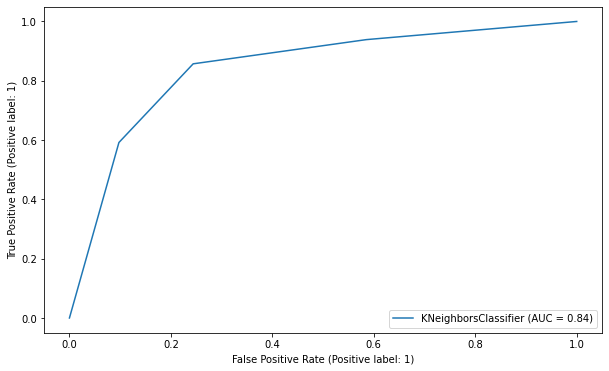

In [934]:
plot_roc_curve(knn_grid_model, X_test_scaled, y_test)

In [977]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8434544549527128

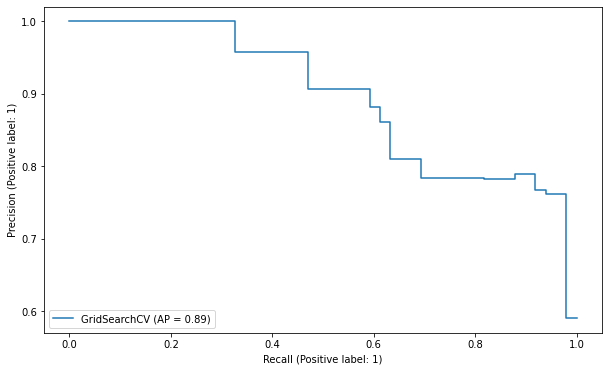

In [978]:
plot_precision_recall_curve(knn_grid_model, X_test_scaled, y_test);

Recall score improves nearly %1.

## Pipeline

In [936]:
from sklearn.pipeline import Pipeline

In [937]:
operations = [("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier())]

In [938]:
Pipeline(steps=operations)

Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [939]:
pipe_model = Pipeline(steps=operations)

In [940]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [941]:
y_pred = pipe_model.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0], dtype=int64)

## Model Performance

In [942]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

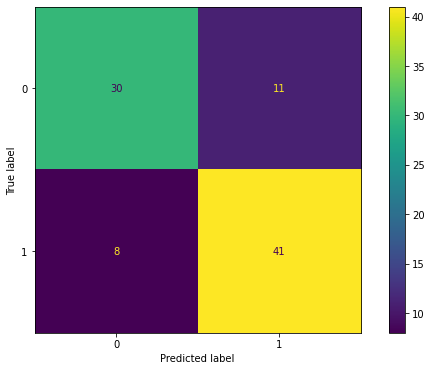

In [943]:
plot_confusion_matrix(pipe_model, X_test, y_test);

In [944]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set

[[30 11]
 [ 8 41]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        41
           1       0.79      0.84      0.81        49

    accuracy                           0.79        90
   macro avg       0.79      0.78      0.79        90
weighted avg       0.79      0.79      0.79        90


Train_Set

[[83 13]
 [15 99]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86        96
           1       0.88      0.87      0.88       114

    accuracy                           0.87       210
   macro avg       0.87      0.87      0.87       210
weighted avg       0.87      0.87      0.87       210



## Changing the parameters of the pipe_model

In [945]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [946]:
pipe_model.set_params(knn__n_neighbors= 3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [947]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=3))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'knn': KNeighborsClassifier(n_neighbors=3),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 3,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [948]:
pipe_model['scaler']

MinMaxScaler()

In [949]:
pipe_model["knn"]

KNeighborsClassifier(n_neighbors=3)

## GridSearch on Pipeline

In [950]:
from sklearn.model_selection import GridSearchCV

In [951]:
param_grid = {'knn__n_neighbors': range(1,30)}
pipe_model = Pipeline(steps=operations)

In [952]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring= 'recall')

In [953]:
pipe_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'knn__n_neighbors': range(1, 30)}, scoring='recall')

In [954]:
pipe_grid.best_params_

{'knn__n_neighbors': 23}

In [980]:
pipe_grid.best_score_

0.8590909090909091

In [979]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set

[[31 10]
 [ 7 42]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.78        41
           1       0.81      0.86      0.83        49

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90


Train_Set

[[82 14]
 [16 98]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        96
           1       0.88      0.86      0.87       114

    accuracy                           0.86       210
   macro avg       0.86      0.86      0.86       210
weighted avg       0.86      0.86      0.86       210



## CrossValidate on Pipeline

In [958]:
operations = [('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=3))]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.841
test_recall      0.823
test_f1          0.827
test_accuracy    0.810
dtype: float64

### ___Final Scores of KNN Model__

Since the main interest is to better predict the hearth strokes before they occur. The KNN-pipe-model has a recall value of 86% (Recall in percentage: 42/49x100). But, KNN model with K=19 has recall value of 88%. But, precision value drops from 81% to 78%. So, the best recall score is obtained at K=19.

In [959]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

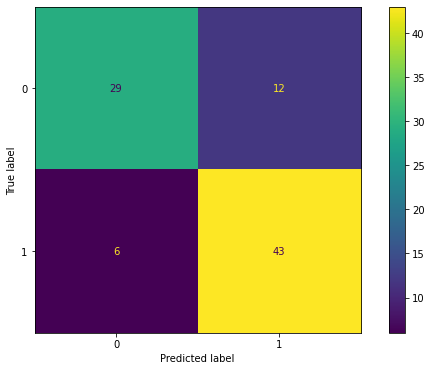

In [984]:
plot_confusion_matrix(knn_grid_model, X_test_scaled, y_test);

# Visually compare models based on your chosen metric

__Logistic Regression__

Logistic regression and the improved model with grid search have same confusion matirces and same recall value of 90%

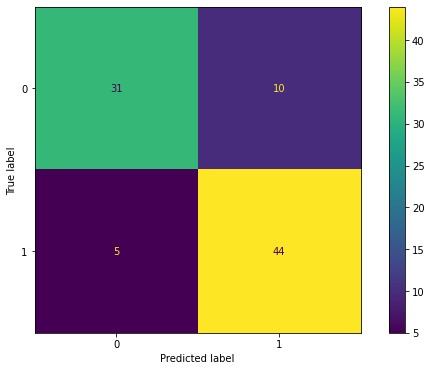

In [1017]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test);

__K-Nearest Neighbors(KNN)__

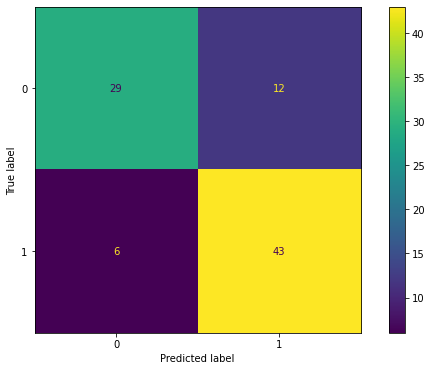

In [1014]:
plot_confusion_matrix(knn_grid_model, X_test_scaled, y_test);

Best recall value is 88% and obtained at K=19.

# Chose best model and make a random prediction 

From confusion matrices above, it can be seen that logistic regression has more true positive and less false nagative in test set. Moreover, logistic regression has detected more true negatives and less false positive. Therefore, the best prediction is made by logistic regression model.

In [1036]:
scaler = MinMaxScaler().fit(X)

In [1037]:
import pickle
pickle.dump(scaler, open("scaler_heartstroke", 'wb'))

In [1038]:
X_scaled = scaler.transform(X)

In [1039]:
final_model = LogisticRegression(C= 6.6, class_weight= None ,penalty= 'l2',solver= 'lbfgs').fit(X_scaled, y)

In [1040]:
pickle.dump(final_model, open("final_model_diabates", 'wb'))

In [1041]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,300.000,54.433,9.077,29.000,47.750,56.000,61.000,77.000
resting_blood_pressure,300.000,131.627,17.620,94.000,120.000,130.000,140.000,200.000
cholesterol,300.000,246.743,51.838,126.000,211.000,241.500,275.000,564.000
max_heart_rate_achieved,300.000,149.663,22.890,71.000,133.750,152.500,166.000,202.000
st_depression,300.000,1.047,1.164,0.000,0.000,0.800,1.600,6.200
num_major_vessels,300.000,0.723,1.008,0.000,0.000,0.000,1.000,4.000
sex_female,300.000,0.317,0.466,0.000,0.000,0.000,1.000,1.000
sex_male,300.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
chest_pain_type_asymptomatic,300.000,0.077,0.267,0.000,0.000,0.000,0.000,1.000
chest_pain_type_atypical angina,300.000,0.167,0.373,0.000,0.000,0.000,0.000,1.000


In [1114]:
my_sample = [{'age': 39,
  'resting_blood_pressure': 113,
  'cholesterol': 165,
  'max_heart_rate_achieved': 117,
  'st_depression': 2.5,
  'num_major_vessels': 0,
  'sex_female': 0,
  'sex_male': 1,
  'chest_pain_type_asymptomatic': 0,
  'chest_pain_type_atypical angina': 0,
  'chest_pain_type_non-anginal pain': 0,
  'chest_pain_type_typical angina': 1,
  'fasting_blood_sugar_greater than 120mg/ml': 0,
  'fasting_blood_sugar_lower than 120mg/ml': 1,
  'rest_ecg_ST-T wave abnormality': 0,
  'rest_ecg_left ventricular hypertrophy': 0,
  'rest_ecg_normal': 1,
  'exercise_induced_angina_no': 0,
  'exercise_induced_angina_yes': 1,
  'st_slope_downsloping': 0,
  'st_slope_flat': 1,
  'st_slope_upsloping': 0,
  'thalassemia_fixed defect': 0,
  'thalassemia_normal': 0,
  'thalassemia_reversable defect': 1},
{'age': 53,
  'resting_blood_pressure': 175,
  'cholesterol': 189,
  'max_heart_rate_achieved': 159,
  'st_depression': 1.2,
  'num_major_vessels': 0,
  'sex_female': 0,
  'sex_male': 1,
  'chest_pain_type_asymptomatic': 0,
  'chest_pain_type_atypical angina': 0,
  'chest_pain_type_non-anginal pain': 1,
  'chest_pain_type_typical angina': 0,
  'fasting_blood_sugar_greater than 120mg/ml': 1,
  'fasting_blood_sugar_lower than 120mg/ml': 0,
  'rest_ecg_ST-T wave abnormality': 1,
  'rest_ecg_left ventricular hypertrophy': 0,
  'rest_ecg_normal': 0,
  'exercise_induced_angina_no': 1,
  'exercise_induced_angina_yes': 0,
  'st_slope_downsloping': 1,
  'st_slope_flat': 0,
  'st_slope_upsloping': 0,
  'thalassemia_fixed defect': 0,
  'thalassemia_normal': 0,
  'thalassemia_reversable defect': 1}]

In [1115]:
sample = pd.DataFrame(my_sample)
sample

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,...,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,39,113,165,117,2.500,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
1,53,175,189,159,1.200,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [1116]:
scaler_heartstroke = pickle.load(open("scaler_heartstroke", "rb"))

In [1117]:
sample_scaled = scaler_heartstroke.transform(sample)
sample_scaled

array([[0.20833333, 0.17924528, 0.0890411 , 0.35114504, 0.40322581,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ],
       [0.5       , 0.76415094, 0.14383562, 0.67175573, 0.19354839,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ]])

In [1118]:
final_model = pickle.load(open("final_model_diabates", "rb"))

In [1119]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [1120]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred"] = predictions
sample

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,...,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,pred_proba,pred
0,39,113,165,117,2.500,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0.043,0
1,53,175,189,159,1.200,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0.782,1


Similar to observations in dataframe, two samples are created. The first sample is expected to have 0 class label and the second should have class label of 1. In other words, the second has heart stroke.